In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle
from src.utils import get_best_t
from src.utils import get_theory_curves
from src.data_load import load_minimum, collect_minima
from src.utils import get_full_theory_curves, get_best_params

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 14,
    'style'  : 'normal'}
matplotlib.rc('font', **font)

In [2]:
from ../src.infer_density import load_array, extract_minimum_from_slope, compute_theory_minima, compute_log_derivative_from_scaling, fit_T_v0_from_minimum, plot_fit

s_min = 27.93 kb, y_min = -0.843
[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9]
Best fit from the DIP: T = 150.0 kb, v0 = 6.70 kb, density = 6.67 loops/Mb
Best fit from the CURVE: T = 150.0 kb, v0 = 6.60 kb, density = 6.67 loops/Mb


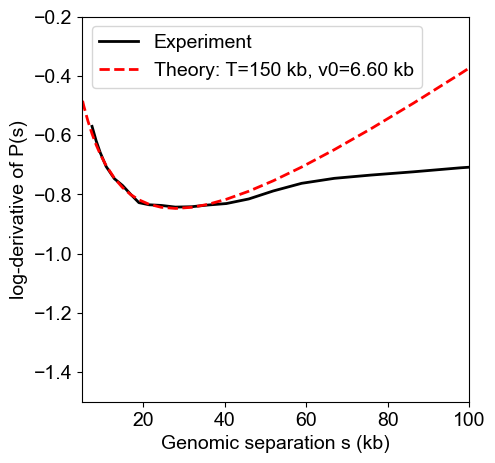

In [4]:
# --- Load your data ---
data_dir = "../data"
mids = load_array(f"{data_dir}/abramo_4h_mids.pickle")
scaling = load_array(f"{data_dir}/abramo_4h_scalings.pickle")

# --- Compute slope ---
slope = compute_log_derivative_from_scaling(mids, scaling)

# --- Find experimental minimum ---
s_min, y_min = extract_minimum_from_slope(mids, slope)
print(f"s_min = {s_min:.2f} kb, y_min = {y_min:.3f}")

# --- Generate theoretical grid ---
T_values = np.arange(100, 301, 10)
v0_values = np.arange(0.1, 15, 0.1)
print(v0_values)

# Obtain the best-fit parameters from the DIP
minima = compute_theory_minima(T_values, v0_values)

T_best, v0_best, err = fit_T_v0_from_minimum(s_min, y_min, minima)
print(f"Best fit from the DIP: T = {T_best:.1f} kb, v0 = {v0_best:.2f} kb, density = {1000/T_best:.2f} loops/Mb")

# Obtain the best-fit parameters from the CURVE around the dip, i.e. s \in (sfit_min, sfit_max)
s_grid, y_array, T_values, v0_values = get_full_theory_curves(T_values, v0_values, s_min=1, s_max=50)

T_opt, v0_opt, s_fit, y_th_fit_opt = get_best_params(mids, slope, s_grid, y_array, \
                    T_values, v0_values, sfit_min=8, sfit_max=40, return_curves=True) 

print(f"Best fit from the CURVE: T = {T_opt:.1f} kb, v0 = {v0_opt:.2f} kb, density = {1000/T_opt:.2f} loops/Mb")


# --- Plot comparison ---
plot_fit(mids, slope, T_opt, v0_opt)

s_min = 31.94 kb, y_min = -0.860
[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9]
Best fit from the DIP: T = 170.0 kb, v0 = 7.20 kb, density = 5.88 loops/Mb
Best fit from the CURVE: T = 160.0 kb, v0 = 6.60 kb, density = 6.25 loops/Mb


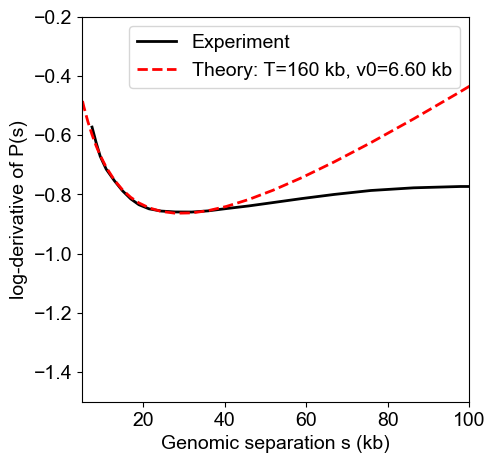

In [7]:
# --- Load your data ---
mids = load_array(f"{data_dir}/full_logder_x_oksuz_hff_hg38_deep.pickle")
slope = load_array(f"{data_dir}/full_logder_y_oksuz_hff_hg38_deep.pickle")

# --- Find experimental minimum ---
s_min, y_min = extract_minimum_from_slope(mids, slope)
print(f"s_min = {s_min:.2f} kb, y_min = {y_min:.3f}")

# --- Generate theoretical grid ---
T_values = np.arange(100, 301, 10)
v0_values = np.arange(0.1, 15, 0.1)
print(v0_values)

# Obtain the best-fit parameters from the DIP
minima = compute_theory_minima(T_values, v0_values)

T_best, v0_best, err = fit_T_v0_from_minimum(s_min, y_min, minima)
print(f"Best fit from the DIP: T = {T_best:.1f} kb, v0 = {v0_best:.2f} kb, density = {1000/T_best:.2f} loops/Mb")

# Obtain the best-fit parameters from the CURVE around the dip, i.e. s \in (sfit_min, sfit_max)
s_grid, y_array, T_values, v0_values = get_full_theory_curves(T_values, v0_values, s_min=1, s_max=50)

T_opt, v0_opt, s_fit, y_th_fit_opt = get_best_params(mids, slope, s_grid, y_array, \
                    T_values, v0_values, sfit_min=8, sfit_max=40, return_curves=True) 

print(f"Best fit from the CURVE: T = {T_opt:.1f} kb, v0 = {v0_opt:.2f} kb, density = {1000/T_opt:.2f} loops/Mb")


# --- Plot comparison ---
plot_fit(mids, slope, T_opt, v0_opt)

s_min = 27.93 kb, y_min = -0.720
[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9]
Best fit from the DIP: T = 130.0 kb, v0 = 9.10 kb, density = 7.69 loops/Mb
Best fit from the CURVE: T = 130.0 kb, v0 = 9.00 kb, density = 7.69 loops/Mb


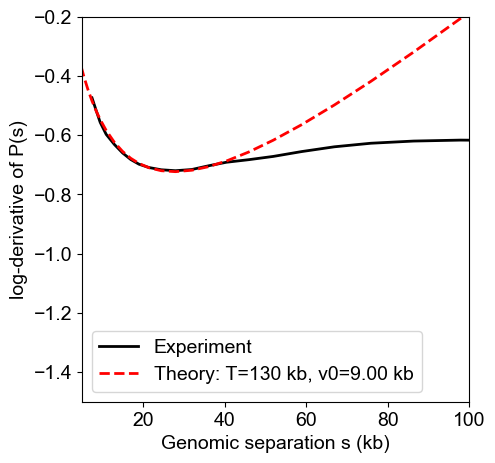

In [8]:
# --- Load your data ---
mids = load_array(f"{data_dir}/full_logder_x_oksuz_esc_U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool.pickle")
slope = load_array(f"{data_dir}/full_logder_y_oksuz_esc_U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool.pickle")

# --- Find experimental minimum ---
s_min, y_min = extract_minimum_from_slope(mids, slope)
print(f"s_min = {s_min:.2f} kb, y_min = {y_min:.3f}")

# --- Generate theoretical grid ---
T_values = np.arange(100, 301, 10)
v0_values = np.arange(0.1, 15, 0.1)
print(v0_values)

# Obtain the best-fit parameters from the DIP
minima = compute_theory_minima(T_values, v0_values)

T_best, v0_best, err = fit_T_v0_from_minimum(s_min, y_min, minima)
print(f"Best fit from the DIP: T = {T_best:.1f} kb, v0 = {v0_best:.2f} kb, density = {1000/T_best:.2f} loops/Mb")

# Obtain the best-fit parameters from the CURVE around the dip, i.e. s \in (sfit_min, sfit_max)
s_grid, y_array, T_values, v0_values = get_full_theory_curves(T_values, v0_values, s_min=1, s_max=50)

T_opt, v0_opt, s_fit, y_th_fit_opt = get_best_params(mids, slope, s_grid, y_array, \
                    T_values, v0_values, sfit_min=8, sfit_max=40, return_curves=True) 

print(f"Best fit from the CURVE: T = {T_opt:.1f} kb, v0 = {v0_opt:.2f} kb, density = {1000/T_opt:.2f} loops/Mb")


# --- Plot comparison ---
plot_fit(mids, slope, T_opt, v0_opt)